# MIE1624 Group Project Pt.2

## Topic: Facilitating Canada's Innovation Ecosystem: Focus on Key Driving Sectors

In Pt.1 we evaluate Canada's global standing on innovation and identifies three main sectors that are the potential driving force for Canada's innovation ecosystems, with evaluations on its strength and weakness by each sector.

The three main sectors are:

* Information and Culture Industries

* Professional Scientific and Technical Services

* Manufacturing

In Pt.2, we analyzed how other countries' innovation performance, such as

* Finland, the most comparable country with Canada and

* the top country on innovation, especially US

for each sectors, to give us a better insights on how to improve Canada's current innovation strategies on each key sector.

Next, in Pt.2 we want to evaluate the factors that drives the innovation performance. e.g.

* the main cooperatio of innovation in each sector
* the most critical type of innovation cooperation partner in each sector
* the most critical type of government program in each sector

Also, we want to consider the

* obstacles to Canada's innovation in each sector.

# 1 . Factors Influencing Innovation in Canada's Key Sectors.

* Data source: Statistics Canada (https://www150.statcan.gc.ca/n1/en/type/data?text=innovation).

* Analyze the drivers of innovation performance in the selected sectors in Canada.

## Co-operation on innovation activities for key sectors 2020/2022


Data: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2710017801

In [12]:
import pandas as pd

In [13]:
def find_coop(dataset, col):
    """
    Filters the dataset for specific NAICS sectors and specific STATUS values ('B' or 'E')
    and selects relevant columns.

    Parameters:
    - dataset: pandas DataFrame containing the data.
    - col: The name of the column to include in the output.

    Returns:
    - A filtered DataFrame with relevant columns.
    """
    # Filter for specific NAICS sectors
    filtered_sector = dataset[
        dataset['North American Industry Classification System (NAICS)'].isin([
            'Information and cultural industries [51]',
            'Professional, scientific and technical services [54]',
            'Manufacturing [31-33]'
        ])
    ]

    # Filter for STATUS values ('B' or 'E')
    filtered_sector = filtered_sector[filtered_sector["STATUS"].isin(["B", "E"])]

    # Select relevant columns
    selected_columns = filtered_sector[['North American Industry Classification System (NAICS)',
                                        col,
                                        "VALUE",
                                        "STATUS"]]
    return selected_columns


In [14]:
coop = pd.read_csv("Part2 Data/Canada/Co-operation on innovation activities, by type and location of co-operation partners by industry and enterprise size.csv")
find_coop(coop,"Co-operation on innovation activities")

,North American Industry Classification System (NAICS),Co-operation on innovation activities,VALUE,STATUS
61,Manufacturing [31-33],"Parent, affiliated or subsidiary businesses, t...",34.2,B
62,Manufacturing [31-33],"Suppliers of equipment, materials, components ...",55.6,B
63,Manufacturing [31-33],"Clients or customers from the private sector, ...",40.0,B
145,Information and cultural industries [51],"Parent, affiliated or subsidiary businesses, t...",43.7,B
146,Information and cultural industries [51],"Suppliers of equipment, materials, components ...",45.9,B
147,Information and cultural industries [51],"Clients or customers from the private sector, ...",45.9,B
149,Information and cultural industries [51],"Competitors or other businesses in the sector,...",17.2,B
150,Information and cultural industries [51],"Consultants and commercial laboratories, type ...",16.6,B
151,Information and cultural industries [51],"Universities, colleges or other higher educati...",11.4,B
154,Information and cultural industries [51],"Households or individuals, type of co-operatio...",4.6,B


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_innovation_activities_pie(data, naics_categories, value_column, activity_column, naics_column):
    """
    Creates combined pie charts for co-operation on innovation activities for specified NAICS categories,
    grouping activities with < 5% of the total into an 'Others' category and displaying activity names in a legend.

    Parameters:
    - data: DataFrame containing the dataset.
    - naics_categories: List of NAICS categories to filter and plot.
    - value_column: The column name containing the values for the activities.
    - activity_column: The column name containing the activity names.
    - naics_column: The column name containing the NAICS categories.
    """
    # Filter rows where the NAICS column matches the specified categories
    filtered_data = data[data[naics_column].isin(naics_categories)]

    # Set up the figure with subplots for each category
    fig, axes = plt.subplots(1, len(naics_categories), figsize=(25, 12))  # Adjust figure width for better spacing

    # Function to process and plot data for a specific NAICS category
    def process_and_plot(ax, category_data, title):
        # Sort and select the top 8 values
        category_data = category_data.nlargest(8, value_column)

        # Calculate percentages
        category_data['Percentage'] = category_data[value_column] / category_data[value_column].sum() * 100

        # Separate categories into main and "Others"
        main_data = category_data[category_data['Percentage'] >= 5]
        others_value = category_data[category_data['Percentage'] < 5][value_column].sum()

        # Add "Others" if it exists
        if others_value > 0:
            others_row = pd.DataFrame({
                activity_column: ['Others'],
                value_column: [others_value],
                'Percentage': [others_value / category_data[value_column].sum() * 100]
            })
            main_data = pd.concat([main_data, others_row], ignore_index=True)

        # Plot pie chart on the given axis
        wedges, texts, autotexts = ax.pie(
            main_data[value_column],
            autopct='%1.1f%%',
            startangle=90,  # Start angle at 90 for consistency
            textprops={'fontsize': 10}  # Font size for better readability
        )
        ax.set_title(title, fontsize=12)
        ax.axis('equal')  # Ensure the pie chart is a perfect circle

        # Add a legend with activity labels
        ax.legend(
            labels=main_data[activity_column],
            loc="upper right",
            bbox_to_anchor=(1.3, 1.0),  # Position legend outside the pie chart
            fontsize=10
        )

    # Loop through each NAICS category and generate a subplot
    for ax, naics in zip(axes, naics_categories):
        category_data = filtered_data[filtered_data[naics_column] == naics]
        if not category_data.empty:
            process_and_plot(ax, category_data, f'{activity_column} in {naics} (Top 8)')

    # Adjust layout with better spacing
    plt.tight_layout(pad=5.0, h_pad=3.0, w_pad=7.0)  # Adjust padding between subplots
    plt.show()


# Define the categories
naics_categories = [
    'Information and cultural industries [51]',
    'Professional, scientific and technical services [54]',
    'Manufacturing [31-33]'
]



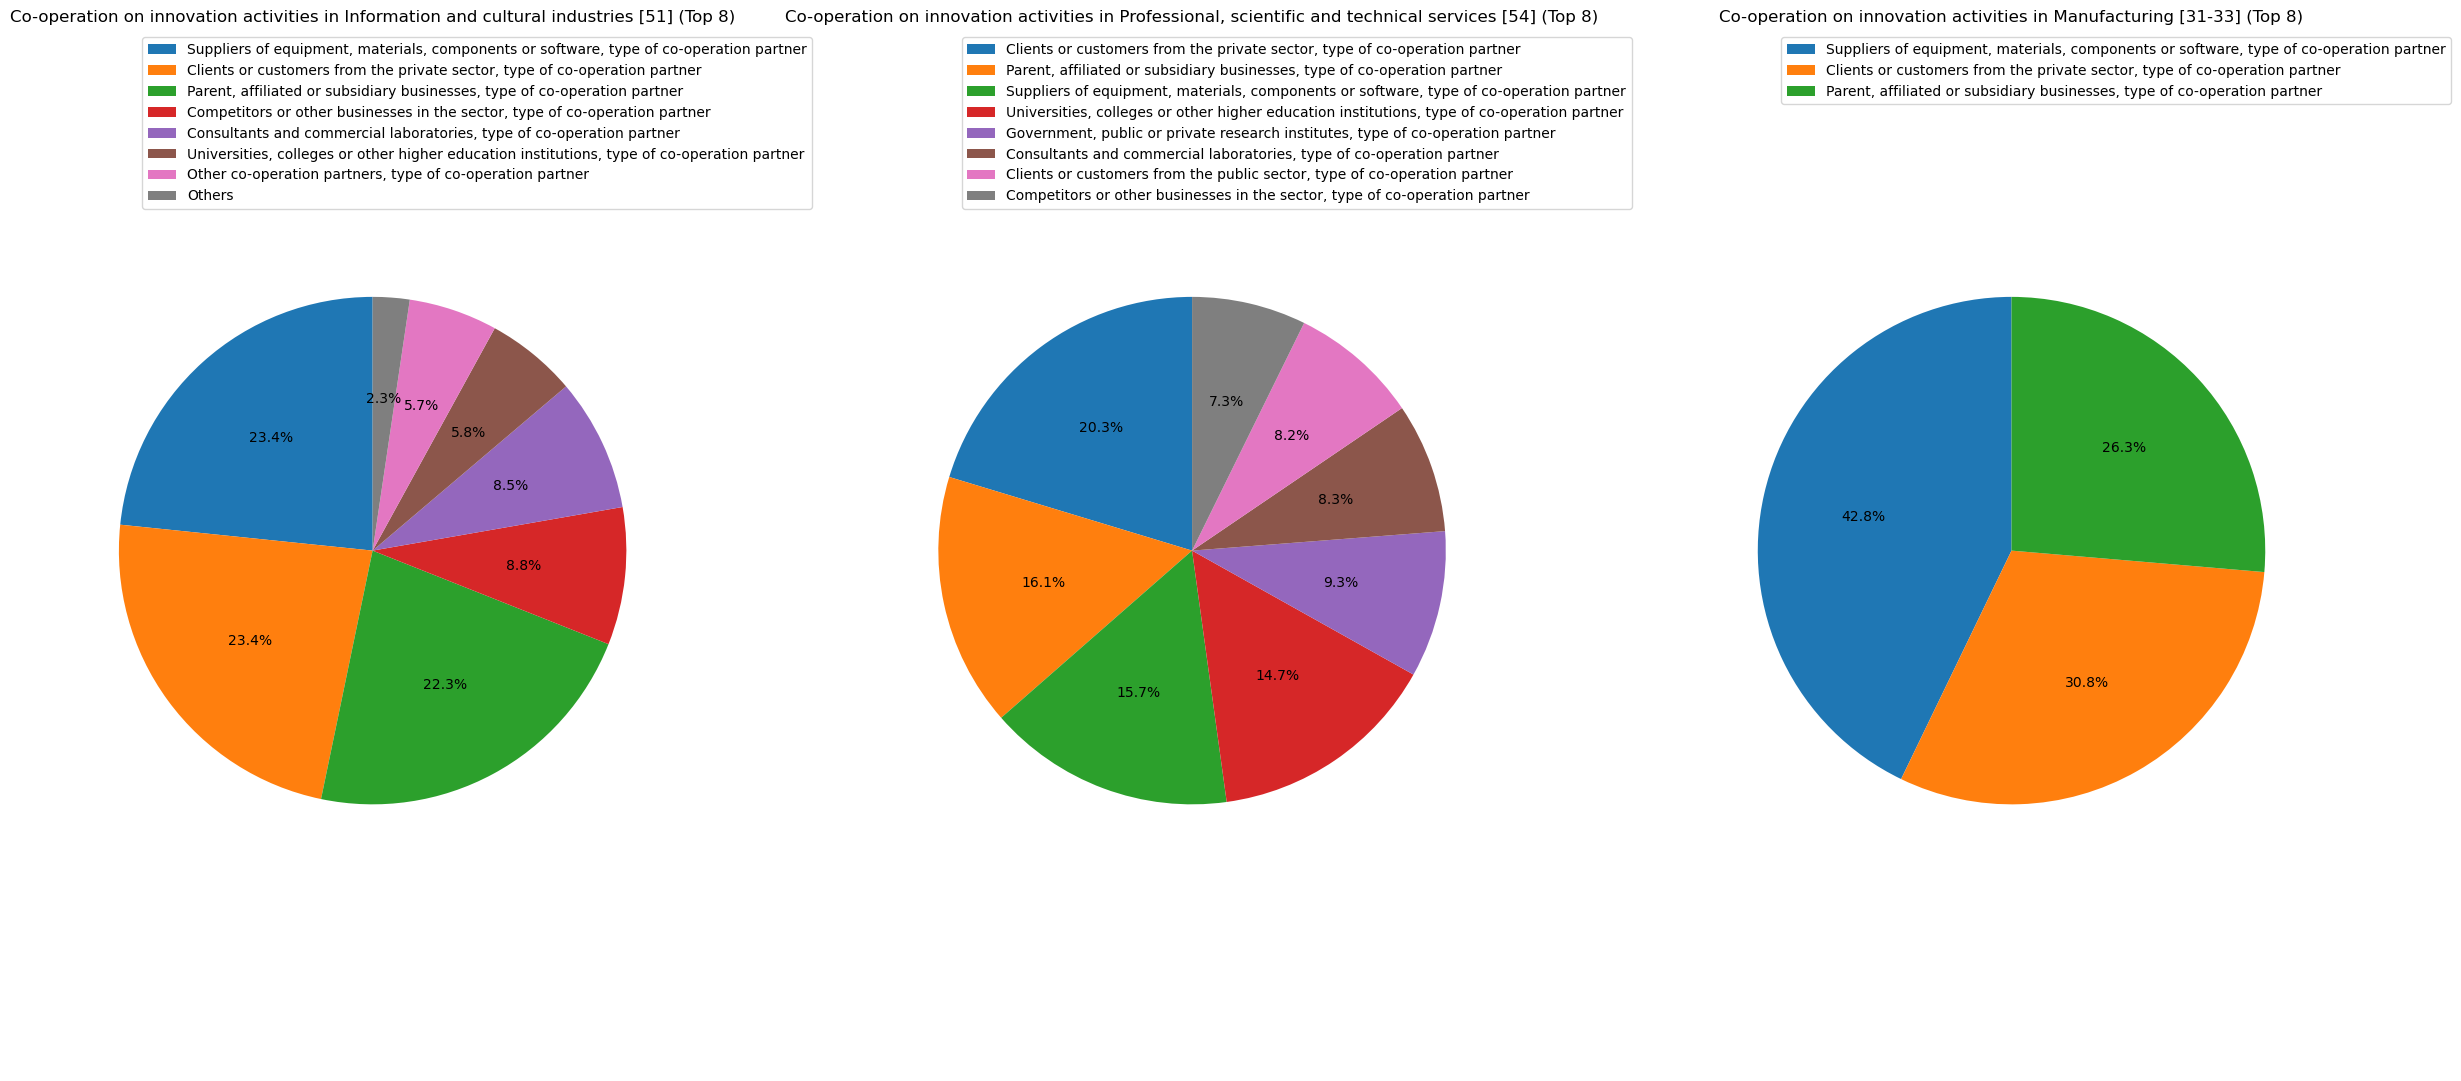

In [16]:
coop = find_coop(coop, "Co-operation on innovation activities")

plot_innovation_activities_pie(
    data=coop,
    naics_categories=naics_categories,
    value_column='VALUE',
    activity_column='Co-operation on innovation activities',
    naics_column='North American Industry Classification System (NAICS)'
)


Explanation:
Government tax incentives are consistently the most important driver of innovation across sectors. However, professional and technical services demonstrate a more diversified reliance on government support mechanisms, including grants and training programs.

## Most critical type of co-operation partner for key sectors 2020/2022


Data: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2710019301


In [17]:
critical_partner = pd.read_csv("Part2 Data/Canada/Most critical co-operation partner for the business_s innovation activities, by industry and enterprise size.csv")
find_coop(critical_partner, "Most critical type of co-operation partner")

,North American Industry Classification System (NAICS),Most critical type of co-operation partner,VALUE,STATUS
56,Manufacturing [31-33],"Suppliers of equipment, materials, components ...",30.7,B
57,Manufacturing [31-33],"Clients or customers from the private sector, ...",22.5,B
132,Information and cultural industries [51],"Parent, affiliated or subsidiary businesses, m...",28.8,B
133,Information and cultural industries [51],"Suppliers of equipment, materials, components ...",18.0,B
134,Information and cultural industries [51],"Clients or customers from the private sector, ...",31.8,E
137,Information and cultural industries [51],"Consultants and commercial laboratories, most ...",7.1,B
139,Information and cultural industries [51],"Government, public or private research institu...",0.0,E
140,Information and cultural industries [51],"Non-profit organizations, most critical",0.0,E
165,"Professional, scientific and technical service...","Parent, affiliated or subsidiary businesses, m...",25.6,B
166,"Professional, scientific and technical service...","Suppliers of equipment, materials, components ...",17.5,B


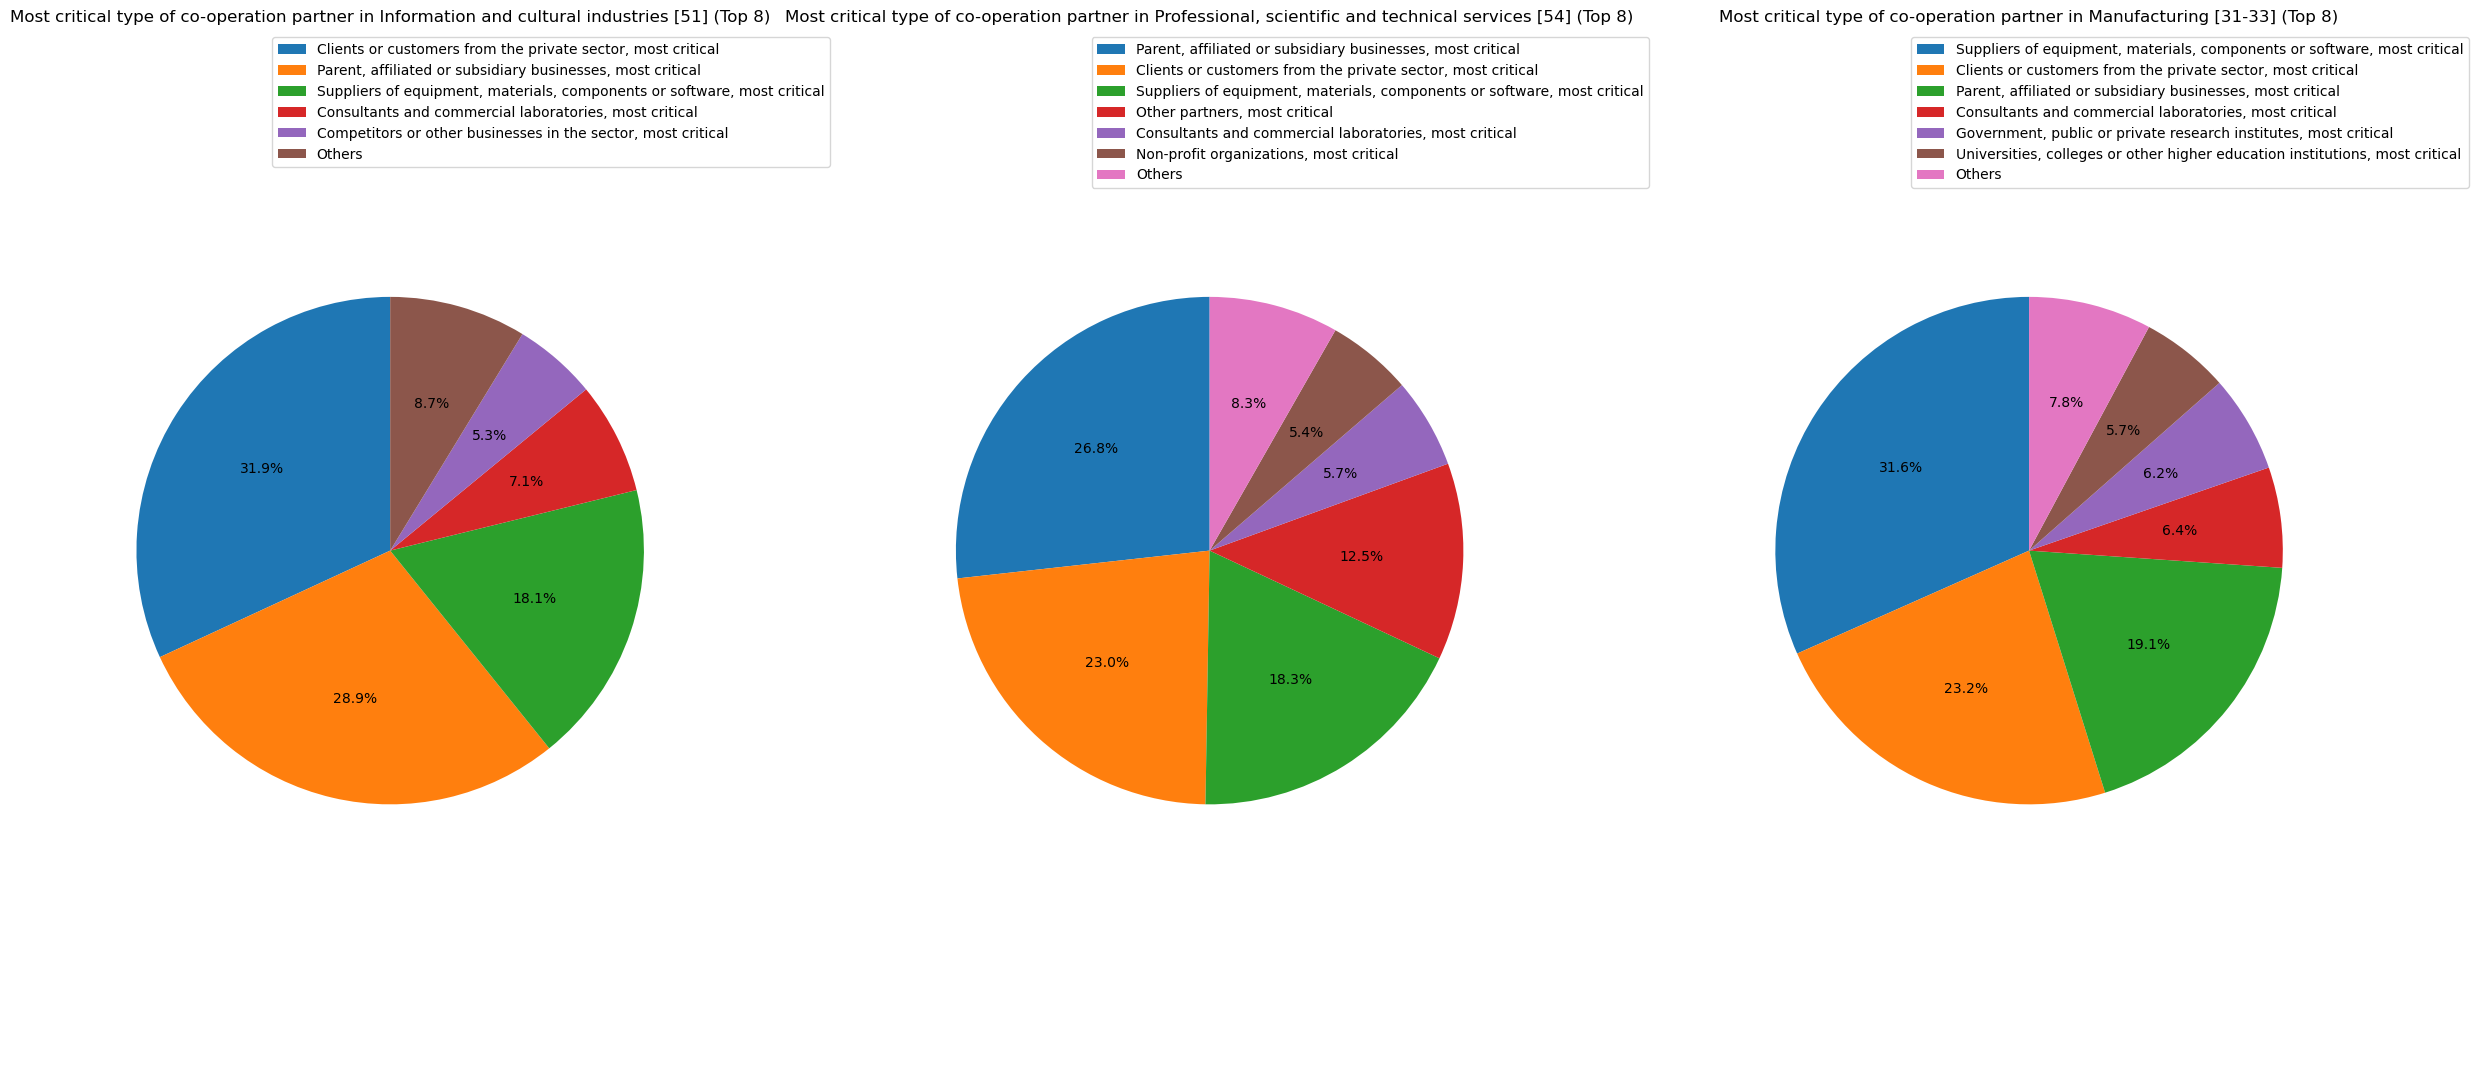

In [18]:
plot_innovation_activities_pie(
    data=critical_partner,
    naics_categories=naics_categories,
    value_column='VALUE',
    activity_column= "Most critical type of co-operation partner",
    naics_column='North American Industry Classification System (NAICS)'
)

## Most critical government program for key sectors 2020/2022

* Information and Culture Industries

* Professional Scientific and Technical Services

* Manufacturing


Data: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2710028001

In [19]:
goverment_program = pd.read_csv("Part2 Data/Canada/Most critical government program for the business_s innovation activities, by industry and enterprise size.csv")
find_coop(goverment_program, "Most critical government program")


,North American Industry Classification System (NAICS),Most critical government program,VALUE,STATUS
60,Information and cultural industries [51],Government tax incentive or tax credit program...,55.7,B
61,Information and cultural industries [51],"Government grants and contributions programs, ...",29.0,B
75,"Professional, scientific and technical service...",Government tax incentive or tax credit program...,51.7,B
76,"Professional, scientific and technical service...","Government grants and contributions programs, ...",25.8,B
77,"Professional, scientific and technical service...","Government training and hiring programs, most ...",17.9,B


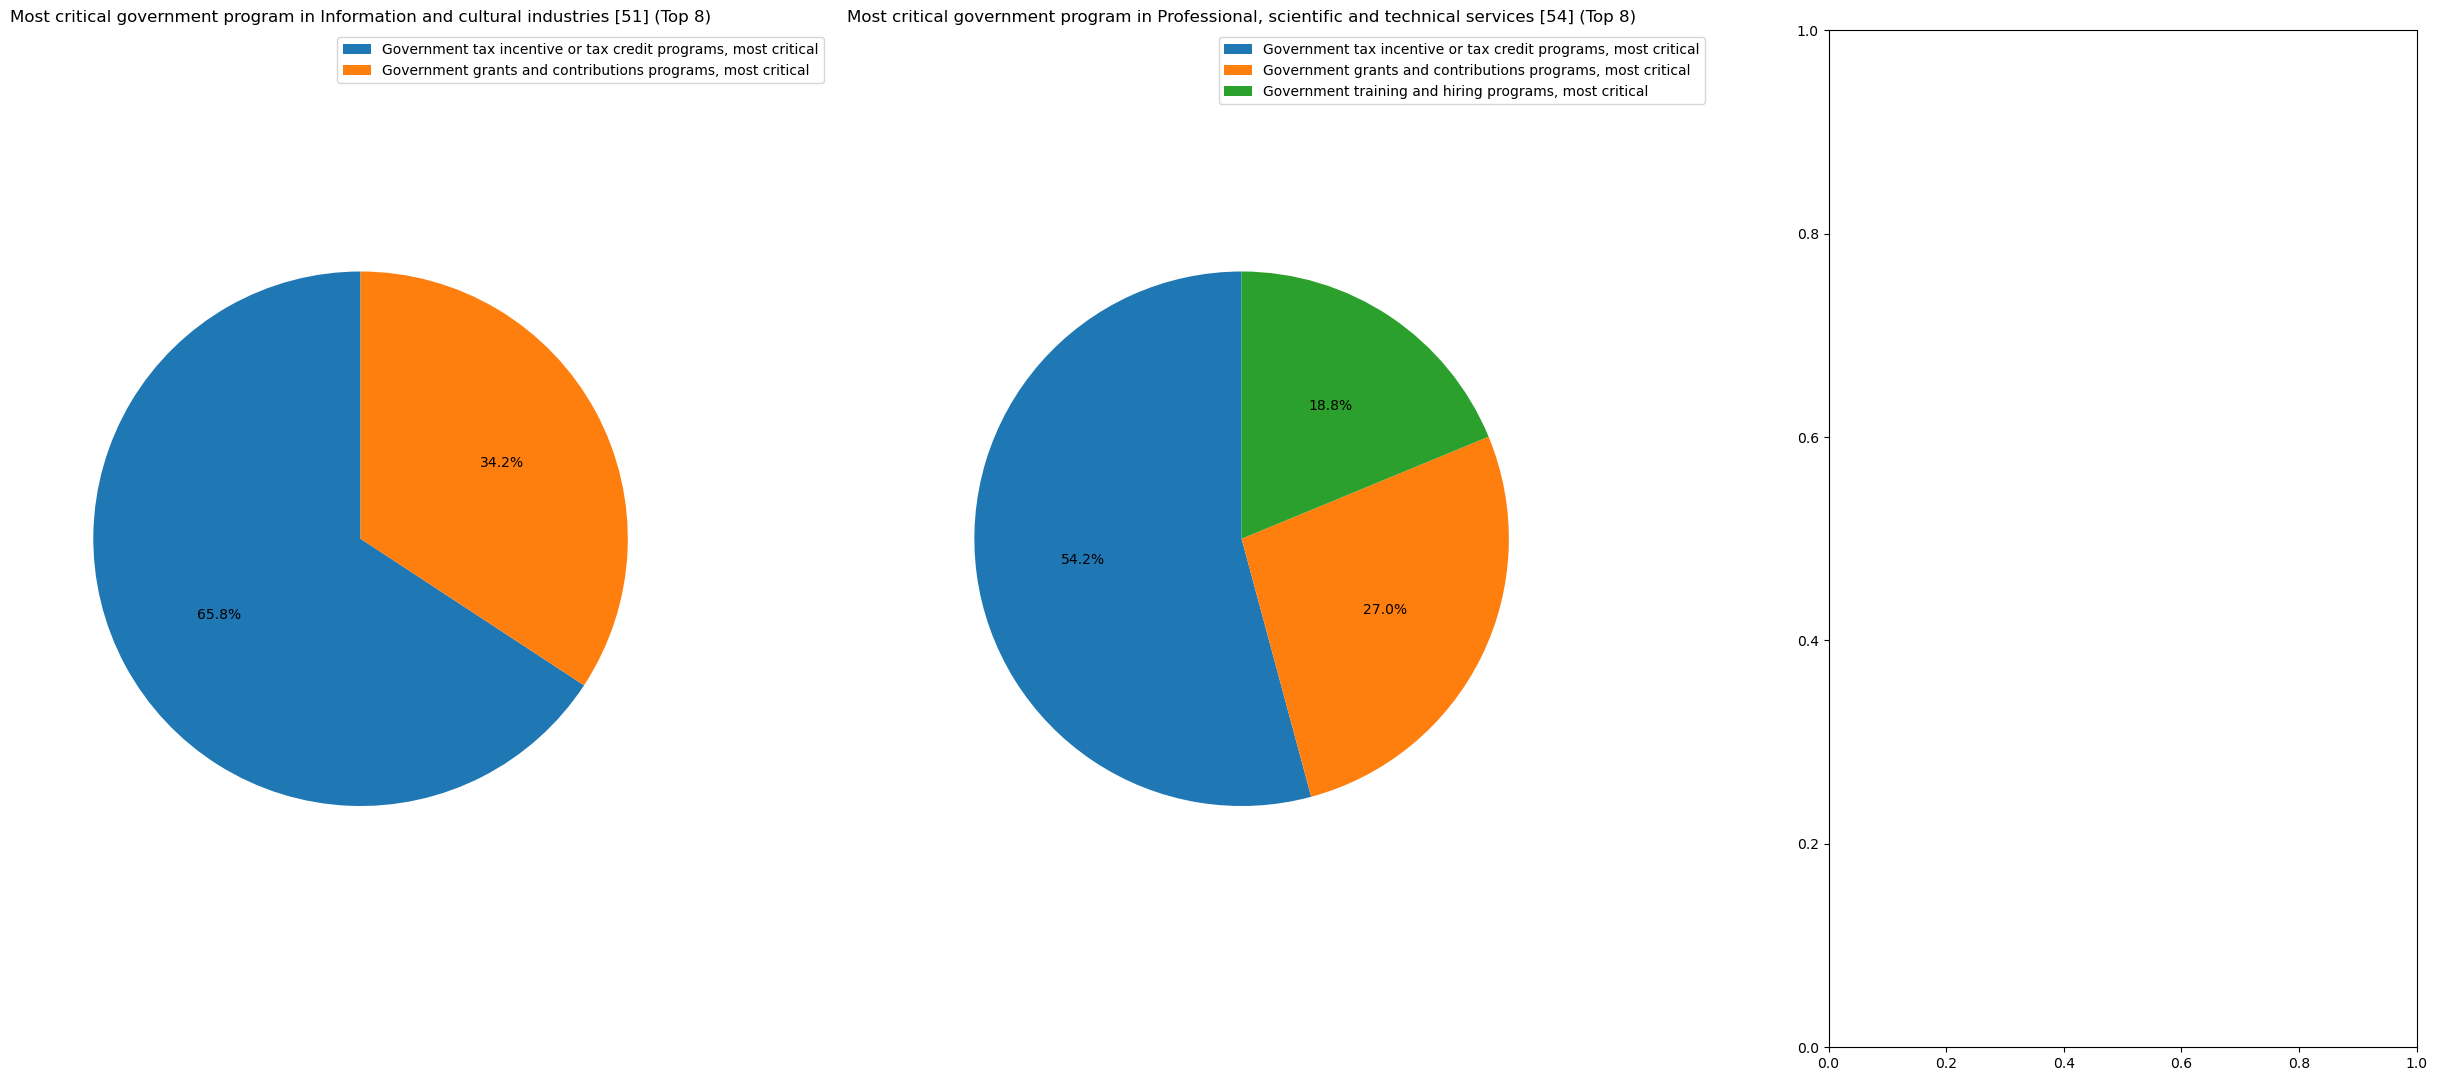

In [20]:
goverment_program = find_coop(goverment_program, "Most critical government program")

plot_innovation_activities_pie(
    data=goverment_program,
    naics_categories=naics_categories,
    value_column='VALUE',
    activity_column="Most critical government program",
    naics_column='North American Industry Classification System (NAICS)'
)

# 2 . Obstacles to Canada's innovation on Key Sectors 2022

Data: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2710036401

In [21]:
obstacles = pd.read_csv("Part2 Data/Canada/Obstacles to innovation and measures taken, by industry and enterprise size.csv")
obstacles = obstacles[obstacles["Obstacles to innovation"] != "At least one obstacle to innovation"]
find_coop(obstacles, "Obstacles to innovation")

,North American Industry Classification System (NAICS),Obstacles to innovation,VALUE,STATUS
135,Information and cultural industries [51],"Lack of skills, obstacle to innovation",30.8,B
137,Information and cultural industries [51],"Uncertainty and risk, obstacle to innovation",32.8,B
165,"Professional, scientific and technical service...","Market size, obstacle to innovation",17.8,B
168,"Professional, scientific and technical service...","Lack of skills, obstacle to innovation",27.4,B
170,"Professional, scientific and technical service...","Uncertainty and risk, obstacle to innovation",34.4,B
173,"Professional, scientific and technical service...","Impacts caused by COVID-19, obstacle to innova...",33.5,B


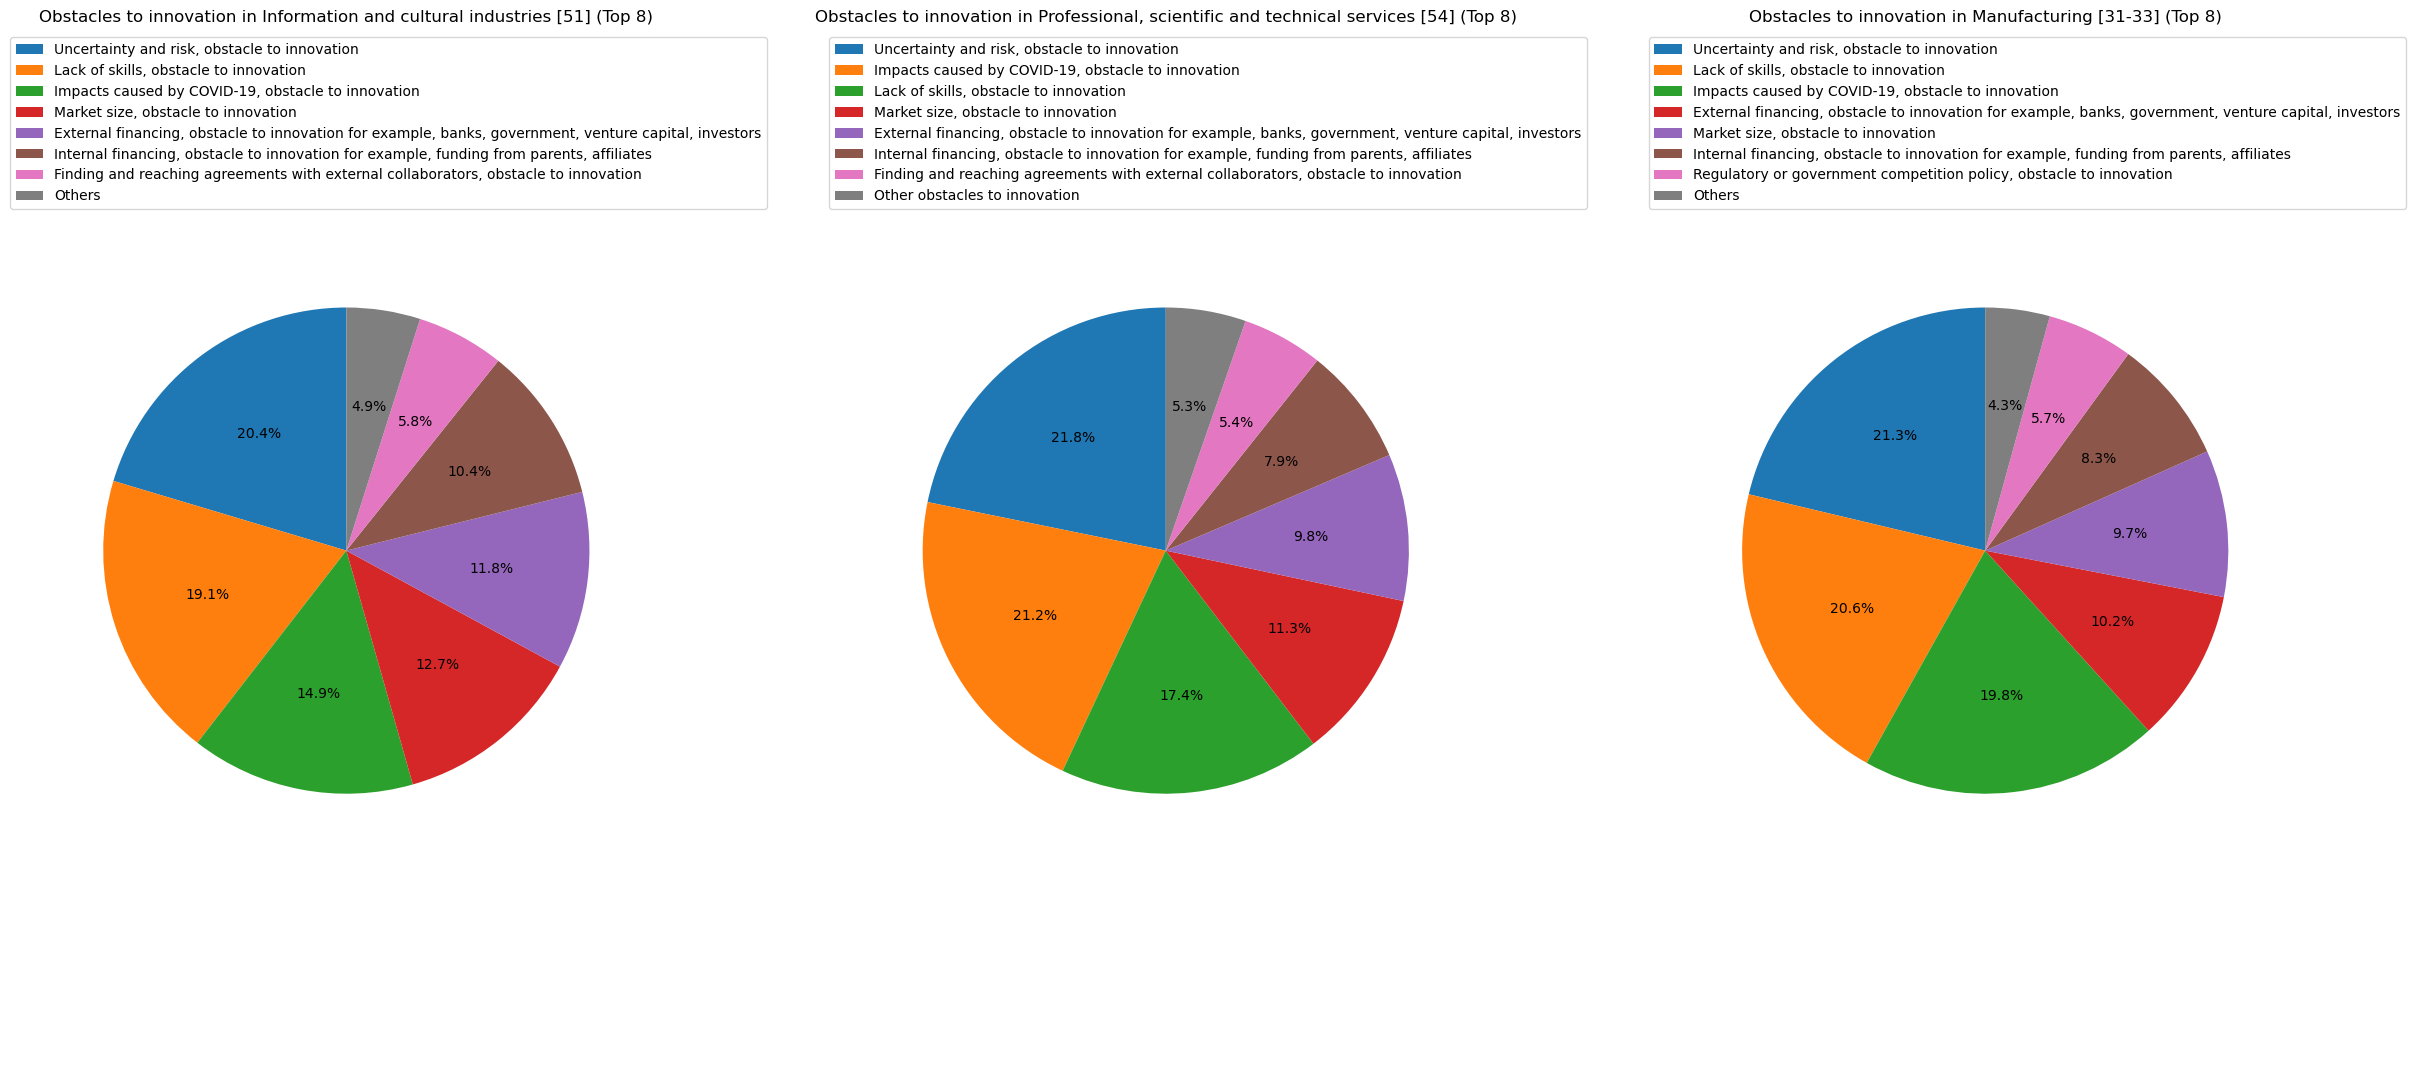

In [22]:
plot_innovation_activities_pie(
    data=obstacles,
    naics_categories=naics_categories,
    value_column='VALUE',
    activity_column= "Obstacles to innovation",
    naics_column='North American Industry Classification System (NAICS)'
)

# 3 . Ask GPT for Strategy Recommendation